In [1]:
import tensorflow as tf
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from keras.preprocessing import image    
import os
import PIL.Image as Image

Using TensorFlow backend.


## load images and classes

In [18]:
IMG_HEIGHT, IMG_WIDTH = 128, 128

test_dir = "./images/to_predict/" #todo use to_predict

test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=0,
    width_shift_range=0,
    height_shift_range=0,
    brightness_range=(0.9, 1.1),
    horizontal_flip=False,
    vertical_flip=False
)

test_data = test_image_generator.flow_from_directory(batch_size=36,
                                                           directory=test_dir,
                                                           shuffle=False,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))


Found 38 images belonging to 4 classes.


## predict images

Predicted Images test_model:


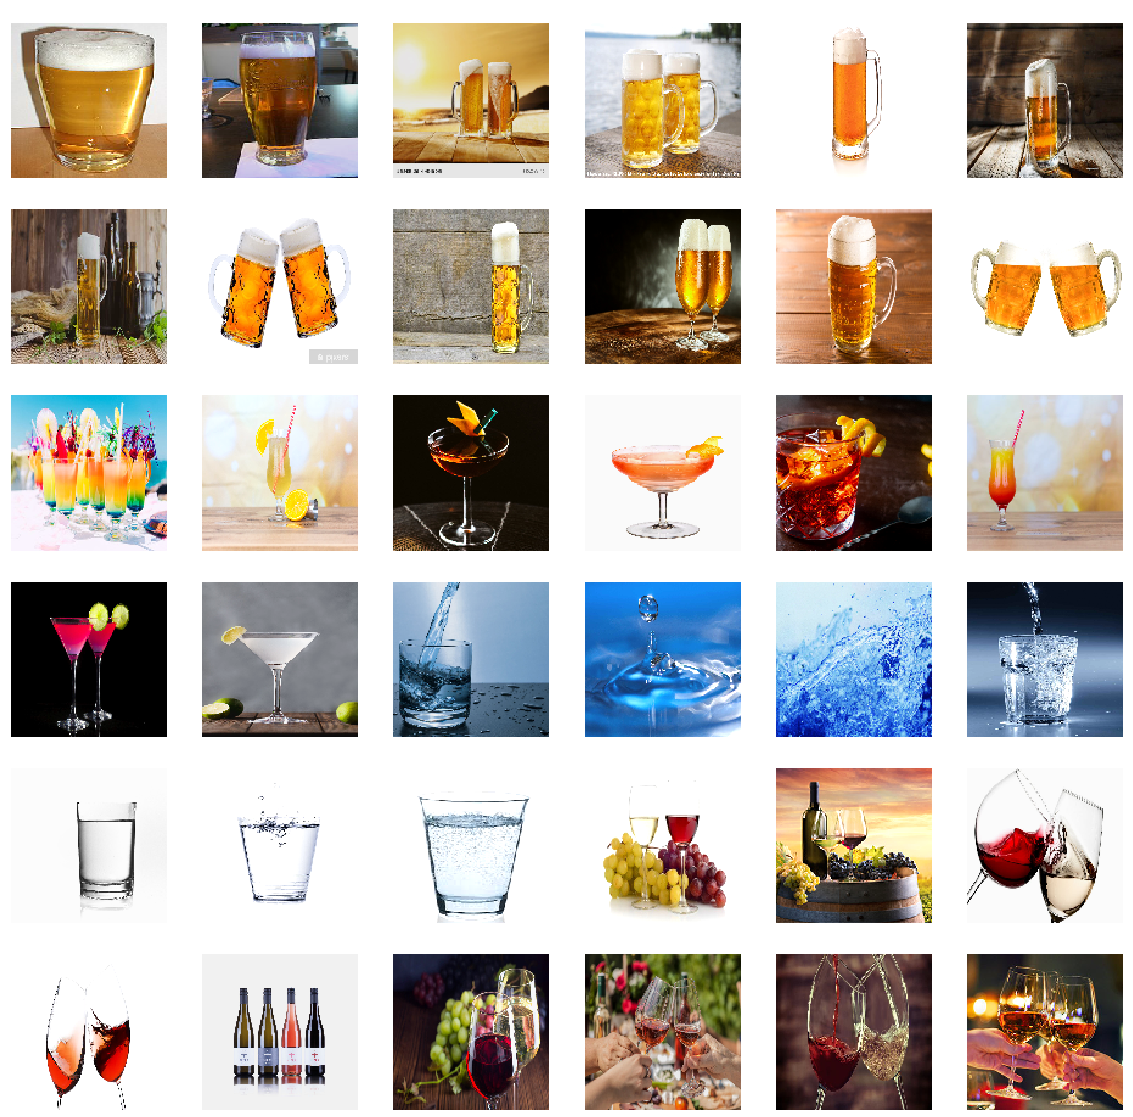

In [19]:
def predict_images(model, name):
    print("Predicted Images %s:" % name)
    
    images, labels = next(test_data)
    class_labels = {v:k for k,v in test_data.class_indices.items()}
    
    fig, axes = plt.subplots(6, 6, figsize=(20,20))
    axes = axes.flatten()
   
    for img, label, ax in zip(images, labels, axes):
        actual_class = np.argmax(label)
        actual_label = class_labels[actual_class]
        
        prediction = model.predict(img[np.newaxis,:])
        
        predicted_class = np.argmax(prediction[0], axis=-1)
        predicted_label = class_labels[predicted_class]
        
        ax.set_title("Pred %s / Act %s" % (predicted_label, actual_label))
        ax.imshow(img)
        ax.axis('off')
        
        
model = tf.keras.models.load_model('drink-detection-model2-g2.h5')
predict_images(model, "test_model") 
        

    

## load models

In [ ]:
for f in os.listdir("./modelsa/"):
    model = tf.keras.models.load_model('models/%s' % f)
    predict_images(model, f)
    